<a href="https://colab.research.google.com/github/kidd000/Acerbi_Textbook/blob/main/acerbi_CH11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

これまでに探索したモデルのほとんどでは、個体は様々なルールに従ってコピーするかしないかを決定します。彼らは、共通の形質をコピーする傾向があったり、集団の一部をコピーする傾向があったり、内在的な特徴を理由に他の人よりも特定の文化的形質を好む傾向があったりします。

これらすべてのモデルの特徴は、これらのルールは安定していると考えられているか、モデルのタイムスケールと比較して非常にゆっくりと変化している（おそらく遺伝的進化のため）と考えられているため、事実上固定されたものとして扱われているということです。しかし、文化的な進化は、それ自身のルールにも影響を与えることができる、つまり、いつ、何を、誰から学ぶかということを、他の人から学ぶことができる。これは珍しい例ではありません：親は、少なくとも現代の西洋社会では、学校の先生から学ぶことが重要であることを子供たちに伝えるために多くの努力を投資したり、ティーンエイジャーのグループは、他のグループから、または一般的に大人から学ぶことをやめるように圧力をかけることがある。韓国や日本のような国の教育システムでは、生徒が教師をほぼ無条件に信頼して学ぶことを奨励していると考えられていますが、イギリスやアメリカのような国では、個人の創造性や批判的思考に重点が置かれています。

# **11.1  　開放性と保守主義**

社会的学習ルールの社会的学習を簡単なモデルでアプローチするにはどうすればよいのだろうか。まず、個人が他者をコピーするかどうかを他者から学習することを想像することができる。以下のような最も単純なダイナミックを想像することができます：単一の形質であるPが他人からコピーする確率を調節し、コピーされる形質でもあるとします。ある個体がP=1のとき、常に他者をコピーする（ここでは完全に「開放的」な個体と呼ぶことにする）、P=0のときは決して他者からコピーしない（ここでは完全に「保守的」な個体と呼ぶことにする）。Pの中間値はすべて可能です。

In [6]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def openness_conservatism(N, t_max, r_max):
  #アウトプット用のデータフレームを作成
  ##run列となるリスト
  run = np.repeat(range(1, r_max + 1), repeats=t_max, axis=0)
  
  ##generation列となるリスト
  generation = np.array(list(range(1, t_max + 1)) * r_max)

  ##p(Aの頻度)列となるリスト
  p = np.zeros(t_max * r_max)

  output = pd.DataFrame()
  output["run"] = run
  output["generation"] = generation
  output["p"] = p

  # 毎回このpandasデータフレームに値を代入していたら処理が重くなるので、numpy3次元アレーで代用
  p_array = np.zeros((r_max, t_max))

  for r in range(r_max):
    # 初めの世代を作る
    population_P = np.random.uniform(low=0, high =1, size=N)

    # 各ラン、初めの世代のpを埋める
    p_array[r, 0] = population_P.mean()

    for t in range(t_max):
      # previous_population_Pというアレーに一時的にコピー
      previous_population_P = population_P

      # デモンストレータのアレーを作る-previous_population_Pからランダムに選ぶ試行をN人分
      demonstrators_P = np.random.choice(a = previous_population_P, size = N, replace = True)

      # コピーする個人を選ぶ(Trueにする)-個人のPの値が0～1の一様分布からランダムに生成した値よりも高ければTrue
      copy = previous_population_P > np.random.uniform(low=0, high =1, size=N)

      # コピーする
      population_P[copy] = demonstrators_P[copy]

      p_array[r, t] = population_P.mean()

  # numpy3次元アレーをpandasのデータフレームへとラン毎に代入
  output = output.assign(p = p_array.flatten())
  #結果（プロットするデータ）をリターン
  return output

この関数は、すべてがおなじみのものであるはずです。唯一の新しい命令は copy <- previous_population$P > runif(N) という行にあります。これは、各個体のP値を0から1の間で抽出した乱数と単純に比較しています。 P値が高ければコピーし、そうでなければコピーしません。

これでシミュレーションを実行し、前の章で書いた連続形質のための関数 plot_multiple_runs_p() でプロットすることができます。

In [20]:
# 結果をプロットするための関数を定義
import seaborn as sns

def plot_multiple_runs(data_model, t_max):
  # 体裁いじいじ
  sns.set_palette("hls",n_colors=24)
  sns.set('poster', 'whitegrid', 'dark', font_scale=1,
          rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
  
  # ランごとの平均値推移
  fig, ax = plt.subplots(figsize=(12, 8))
  sns.lineplot(x="generation", y="p", hue="run", data=data_model, legend = "full", palette="hls")

  # 全ランの平均値推移
  p_mean_list = []
  for g in range(1, t_max+1):
    p_mean_list.append(data_model[data_model.generation == g].p.mean())

  plt.plot(p_mean_list,marker="None",linestyle="-",linewidth=3.0,color="black")
  plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0, title="run")
  plt.ylim(0, 1)
  plt.xlabel("Generation")
  plt.ylabel("Frequency")
  plt.show()

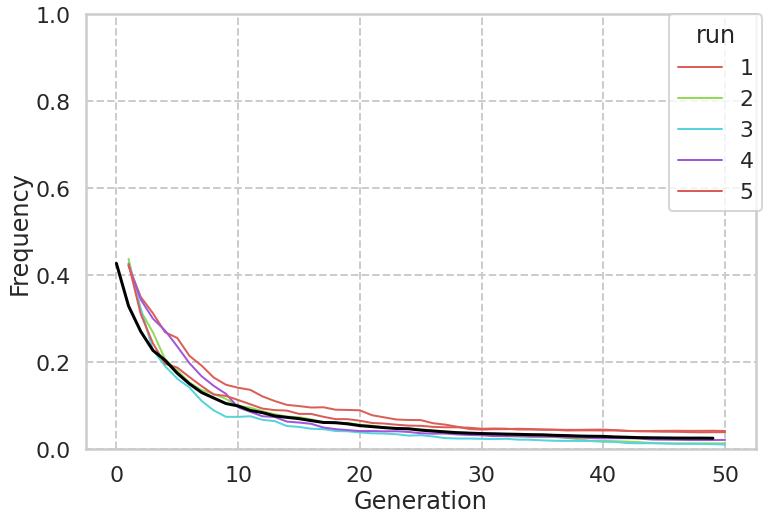

In [14]:
data_model = openness_conservatism(N = 100, t_max = 50, r_max = 5)
plot_multiple_runs(data_model=data_model, t_max=50)

すべてのランにおいて、母集団のPの平均値はすぐに0に向かって（実際には、突然変異がないので、より低い初期値に向かって）収束していきます。
この本のこの時点で、突然変異を導入したり、異なるPの値で母集団を初期化したりすることができるはずです。
例えば、個体が1前後にクラスタリングされたPの値で開始するとどうなるでしょうか、つまり、すべての個体が最初は非常にオープンな状態であるとします。
もう一つのありうる変更点は，コピーする側の P 値を乱数で比較するのではなく，2 人の個体がペアになったときに，P の高い個体（つまり，2 人のうちで最もオープンな個体）がもう 1 人の個体をコピーするということです．

しかしながら、populationが最大値 (P = 1) の保守主義に向かって収束するという主な結果は、多くの変更に頑健です（しかし、あなたは自分で試してみるべきです、モデルとはこういうものです）。この結果－社会的伝達の結果は、社会的伝達を排除すること－は、一見直観的ではないように見えます。この結果を理解する方法は、保守的な個人は、保守的であるという理由だけで、開放的な個人よりも変化が少なく、一般的に、開放的な個人から保守的な個人への移行は、保守的な個人から開放的な個人への移行よりも頻繁に起こるということである。人々がお互いのTシャツの色を真似しているが、赤のTシャツを着た頑固な一人の個人は決して真似しないという部屋を想像してみてください。他の力が作用していない場合は、ある時点ですべての個人が赤いTシャツを着ることになります。


# **11.2  　開放的なpopulationを維持する**

上記の結果は、社会学習のルールそれ自体が社会学習の対象となったときに何が起こるかという興味深い側面を浮き彫りにしているが、もちろん、現実に何が起こるかを表しているわけではない。第8章][ロジャースのモデル]で検討したロジャースのモデルのようないくつかのモデルは、現実がモデル化された状況とどのように異なるかを考えさせてくれるので、まさに有用である。実生活では、他人から学ぶことは平均すると効果的であり、自分の適応度を向上させるので、個人は開放的であり続ける。

しかし、他の人から学ぶことの適応度上の利点を考慮しなくても、文化的な影響に対して開放的であり続ける理由は他にもあるかもしれません。
1.   前述のモデルに少し複雑さを加えて、何が起こるかを見てみましょう。例えば、単一のP値を持つ代わりに、個人は観察する特定の文化的特徴に応じて「開放的」か「保守的」になることができます。ある人はエキゾチックなレシピを試すことに開放的で、別の人はその土地の料理だけが好きで、ある人は格闘技のすべてを知りたがっているが、別の人はテレビで見るのが好きである。私たちは、単一のPの代わりに、文化的特徴に関連した多くの嗜好を持っており、以前と同様に、それらはある個人から別の個人へと伝達されることができると言うことができます。
2.   他の個人が見せてくれる形質に対する好みに応じて、他の個人をコピーすることを決めます。
3.   最後に、これまでの章で探索したモデルとは異なり、集団の中の個体は誕生と死のプロセスを経て入れ替わる。彼らは文化的な特徴を持たずに生まれてきて、それを他の人からコピーしたり、イノベーションによって導入したりすることで、人生の過程で獲得していく。
新しい関数openness_conservatims_2()は，上記のすべてを行います。


In [24]:
def openness_conservatism_2(N, M, mu, p_death, t_max, r_max):
  #アウトプット用のデータフレームを作成
  ##run列となるリスト
  run = np.repeat(range(1, r_max + 1), repeats=t_max, axis=0)
  
  ##generation列となるリスト
  generation = np.array(list(range(1, t_max + 1)) * r_max)

  ##p(形質への選好の平均)列、m(形質の数の平均)列となるリスト
  p = np.zeros(t_max * r_max)
  m = np.zeros(t_max * r_max)

  output = pd.DataFrame()
  output["run"] = run
  output["generation"] = generation
  output["p"] = p
  output["m"] = m

  # 毎回このpandasデータフレームに値を代入していたら処理が重くなるので、numpy3次元アレーで代用
  p_array = np.zeros((r_max, t_max))
  m_array = np.zeros((r_max, t_max))

  for r in range(r_max):
    # 初めの世代を作る　preferenceは、形質への選好（0～1の連続値）/traitsは、文化形質を持つかどうか（0か1の二値）
    population_preferences = np.random.uniform(low=0, high =1, size=(M, N))
    population_traits = np.zeros((M, N))

    # 各ラン、初めの世代のp、mを埋める
    p_array[r, 0] = population_preferences.mean()
    m_array[r, 0] = population_traits.sum()/N

    for t in range(t_max):
      """ イノベーション """
      # N人のうち、確率muに従って、イノベーター（True）を決める
      innovators = np.random.choice([True, False], size=N, p=[mu, 1-mu], replace = True)
      # [0～M-1]のM個の文化形質の内、どれにイノベーションが起きるかを、イノベーターの人数分ランダムに決める（重複あり）
      innovations = np.random.choice(range(M), size=innovators.sum(), replace = True)
      # populationの中で、イノベーターの形質（M個の文化形質の内のどれか）を1（形質を持つ）に変更
      population_traits[innovations, [i for i, x in enumerate(innovators.tolist()) if x == True]] = 1 # enumerate()を使った内包表記でTrueのすべてのindexを取得している

      """ コピー """
      # previous_population_preferencesにコピー
      previous_population_preferences = population_preferences
      # previous_population_traitsにコピー
      previous_population_traits = population_traits

      # デモンストレータの番号と形質をランダムに決める（重複あり）
      demonstrators = np.random.choice(a=range(N), size = N, replace=True)
      demonstrators_traits = np.random.choice(a=range(M),size=N, replace=True)

      # コピーする人を決める（N人分、TrueかFalse）-デモンストレータが形質を持っていて、選好がランダム生成値よりも高かった場合にTrue
      copy = []
      copy_index = []
      # for i in range(N):
      #   if previous_population_traits[demonstrators_traits[i], demonstrators[i]] == 1 and previous_population_preferences[demonstrators_traits[i], i] > np.random.uniform(low=0, high=1, size=1):
      #     copy.append(True)
      #   else:
      #     copy.append(False)
      for i in range(N):
        if previous_population_traits[demonstrators_traits[i], demonstrators[i]] == 1 and previous_population_preferences[demonstrators_traits[i], i] > np.random.uniform(low=0, high=1, size=1):
          copy_index.append(i)
        else:
          pass
      
      # 形質、選好をコピー
      # copy_index = [i for i, x in enumerate(copy) if x == True]
      population_traits[demonstrators_traits[copy_index], copy_index] = 1
      population_preferences[demonstrators_traits[copy_index], demonstrators[copy_index]]

      """Birth/death"""
      #
      replace = np.random.choice([True, False], size=N, p=[p_death, 1-p_death], replace = True)
      population_traits[:, [i for i, x in enumerate(replace) if x == True]] = 0
      population_preferences[:, [i for i, x in enumerate(replace) if x == True]] = np.random.uniform(low=0, high=1, size=replace.sum())

      """各ラン、各世代のp、mを埋める"""
      p_array[r, t] = population_preferences.mean()
      m_array[r, t] = population_traits.sum()/N
  
  """データフレームに代入"""
  output = output.assign(p = p_array.flatten(), m = m_array.flatten())

  return output


母集団はこれで2つの行列、population_preferencesとpopulation_traitsによって記述され、population_preferencesは0から1の間の乱数 で初期化され、population_traitsはすべて0で初期化されています。新生児についても同様です。シミュレーションのパラメータMは、形質の最大数を与えます。各時間ステップで、イノベーターの割合μがランダムに形質を導入する。

このコードの主な目新しさは、コピー手順にあります。ランダムなデモンストレータを選択し、それぞれについてランダムな形質スロットを選択した後、そのデモンストレータをコピーするかどうかを変数（アレー）copyに記録します。これを実現するためには、デモンストレータがランダムに選択された形質を実際に持っている必要があります（`previous_population_traits[cbind(demonstrators,demonstrators_traits)]==1`）。さらに、その形質に対する観察者の選好度が十分に高くなければなりません（`previous_population_preferences[cbind(1:N, demonstrators_traits)] > runif(N)`)。この2つの条件が満たされると、観察者はデモンストレータの形質と選好の両方をコピーします。

前のモデルと似たような状況で、単一の形質（M=1）だけで始めることができます。初期のpopulationに文化的な形質を素早く導入するように、比較的高い革新率（μ=0.1）を設定する。また、pdeath=0.01、つまり、100人の母集団では、各時間ステップごとに平均して1人の新生児が生まれる設定を置く。(いつものように、これらのパラメータの効果を調べてみるとよいでしょう)。

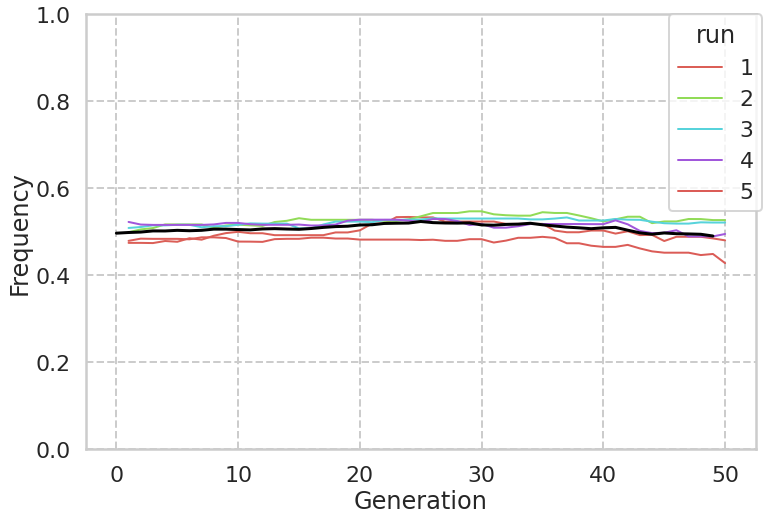

In [25]:
data_model_2 = openness_conservatism_2(N = 100, M = 1, mu = 0.1, p_death = 0.01, t_max = 50, r_max = 5)

plot_multiple_runs(data_model=data_model_2, t_max=50)

プロットは、以前に見たものとかなり似ています。集団の平均開放度は、すべてのランにおいて、数世代で低い値に収束していきます。シミュレーションの最初の段階では、個人は社会的な伝達を開始するために文化的な特徴を獲得する必要があるので、低下の度合いはそれほど急ではありません。ここで、より多くの最大形質数、例えばM = 10で試してみましょう。

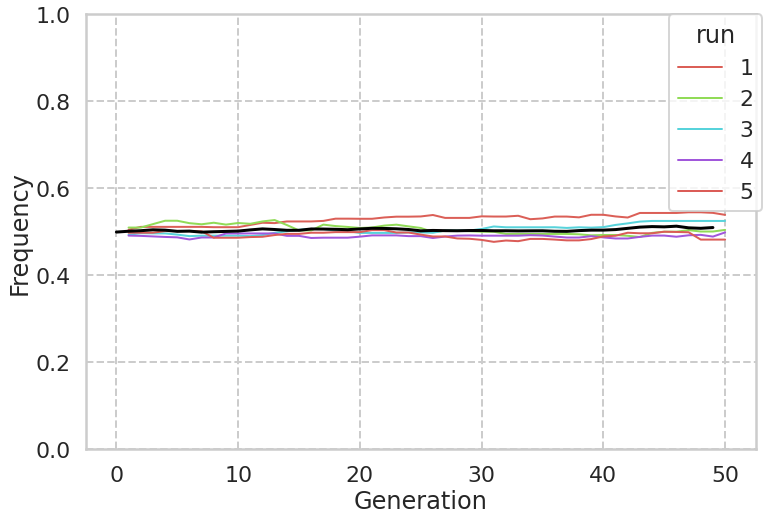

In [18]:
data_model_3 = openness_conservatism_2(N = 100, M = 10, mu = 0.1, p_death = 0.01, t_max = 50, r_max = 5)

plot_multiple_runs(data_model=data_model_3, t_max=50)

収束が遅くなっているようです。tmax=1000に固定して、より長いシミュレーションで試してみましょう。

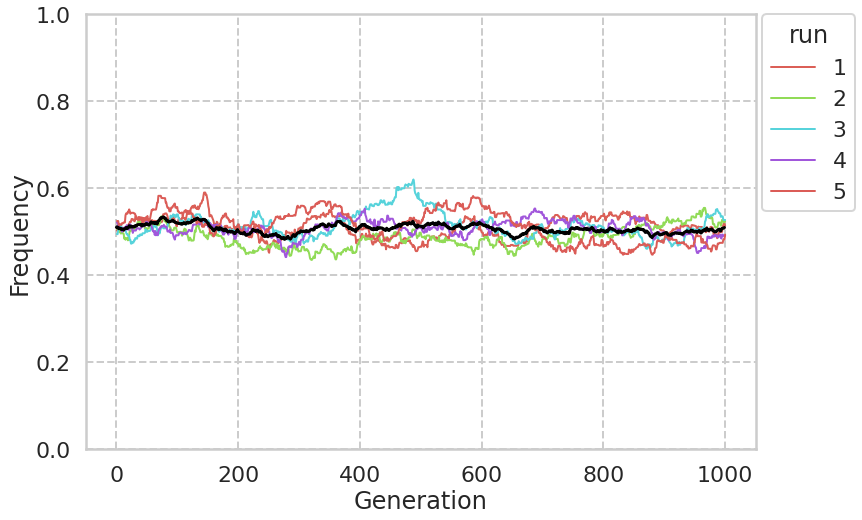

In [21]:
data_model_3 = openness_conservatism_2(N = 100, M = 1, mu = 0.1, p_death = 0.01, t_max = 1000, r_max = 5)

plot_multiple_runs(data_model=data_model_3, t_max=1000)

1000世代後もpopulationの開放度は0にはなりませんでしたが、0.12程度の値で安定しています。何が起こっているかを理解するために、シミュレーションの出力に記録しているもう一つの値、すなわち、個体が持つ形質の平均数をプロットしてみましょう。以下の関数は、通常のplot_multiple_runs()と同じですが、y軸のラベルが異なります。
これにより、y 軸を 0 から M までの範囲に設定して、最大値に対する存在する形質の割合をより視覚的に推定することができます。

平均して、個人は計10個ある可能な形質をすべて持っているわけではありません。個人は生まれてから死ぬまでの過程で入れ替わり、文化的特徴を持たずに生まれてくるので、それを身につけるには時間が必要であることを忘れないで下さい。ここで、より大きな可能性のある文化的レパートリー、例えばM=50で試してみて、平均的な形質の数と同様に、平均的な開放性をプロットしてみましょう。

In [ ]:
この時、平均開放度はさらに高い値（約0.4）に安定し、文化的形質の数は20以下となり、全ての可能な形質数（50）の半分以下となりました。
1000世代後のMと個体群の開放性の関係は、いくつかの代表的なMの値について、明示的に可視化することができます。
これまでの結果から、異なる実行を行っても非常に似たような結果が得られることがわかっているので、各条件について1回の実行のみを考慮しています。

より多くの文化的特徴を身につけることができるほど、個人は開放的なままでいられる。なぜそうなるのでしょうか？前に見たように、保守的な個人は、より安定しているので、その特徴を広めることができます（赤いTシャツの例を思い出してください）。一方、コピーされるためには、その個体の特徴をアピールする必要があります。形質は無作為に選ばれるので、文化的な成功という観点からは、多くの形質を持っている方が良いのです。
この２つの要件は矛盾している：多くの特徴を獲得するためには、個人は比較的開放的な状態を保つ必要がある。このため、文化的なレパートリーが多いと、個人はより長く開放的な状態を保つことができます。

pdeathを減少させることは、Mを減少させることと同様の効果があることを簡単に確認することができます。
個人が長生きすればするほど、より保守的な集団が生まれる。コードに少し手を加えて、個体がより速く学習できるようにすれば、同じ効果が得られます。観察者が各相互作用でデモンストレータからコピーする形質の数を規定するパラメータをモデルに追加することができます（上記のケースでは、このパラメータは1に固定されていたと考えることができる）。文化的伝達がより効果的であればあるほど、populationはより保守的になります。すべては、個人に開放性と保守性の両方を最適化する時間があるかどうかにかかっています：大きなレパートリー、短い寿命、効果的でない文化的伝達のすべてが、比較的開放的な集団を維持します。

# **11.3  　モデルのまとめ**

この章では、私たちが他者から学ぶことができるのは、信念やスキルだけではなく、どのように、いつ、どのようにして他者から学ぶのかを支配するルールでもあるという考えを探った。我々が提示したモデルは、「社会的学習ルールの社会的学習」の結果がどのようなものになるかの表面的な可能性を探っただけであり、読者の皆様には他の可能性を探っていただきたい。成功した文化的モデルは、開放性（他人に好かれる文化形質を獲得する）と同時に保守性（安定性を保ち、コピーされるよう同じ形質を繰り返しアピールする）を統合する必要がある。このことは、成功した文化形質は、多くの人に好かれるだけでなく、ここで定義したように、その担い手の保守性を促すべきであることも示唆している。結局のところ、アブラハミズム宗教（ユダヤ・キリスト・イスラム教）の最初の戒めは、「汝は私の前に他の神々を持たず」であり、「他の神々を調べてみれば、私が優れた神であることが分かるだろう」ではない。しかし、特定の結果にかかわらず、これらのモデルは、社会的学習を支配するルールが固定されているのではなく、それ自体が文化的進化の対象となっているシステムから、予想外の文化的ダイナミクスがいかにして現れるかを強調しています。

# **4.4 　 さらに学びたい人のために**

上記のモデルは、Ghirlanda, Enquist, and Nakamaru (2006) および Acerbi, Enquist, and Ghirlanda (2009) に記載されているモデルに基づいている。Acerbi, Enquist, and Ghirlanda (2009) は、連続的な形質、選好にも可能なイノベーション、文化的伝達の有効性の様々な程度など、本章の主要モデルの変数の可能性を調査している。また、基本的なダイナミクスが個人の特性にどのように影響を与えるのか（若い個人は年配の個人よりも開放的である、年配の個人は若い個人よりも効果的な文化モデルである、など）についても調査している。Acerbi, Ghirlanda, and Enquist (2014)は、これらのモデルを要約し、他のシミュレーションのシナリオを含めた「社会的学習ルールの社会的学習」のトピックについて、より一般的な視点を提供している。Mesoudi et al. (2016)は、社会的学習における個人と文化バリエーションについてのレビューであり、ヒトの社会的学習における文化バリエーションの実証的証拠を含め、様々な文献を紹介している。